In [1]:
# cd to root project

In [2]:
cd ~/mva/recvis/project/cmn/

/Users/quentinleroy/mva/recvis/project/cmn


In [3]:
DIR = './exp-unrel/unrel-dataset/'

In [4]:
import scipy.io as sio
import skimage.io
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

# Annotated triplets

In [5]:
ls exp-unrel/unrel-dataset/

LICENSE                 annotated_triplets.mat  images/
README                  annotations.mat


In [6]:
annotated_triplets = sio.loadmat(DIR + 'annotated_triplets.mat')
triplets = []
for triplet in annotated_triplets['triplets']:
    print(triplet[0][0])
    triplets.append(triplet[0][0])

bike-above-person
building-has-wheel
car-above-road
car-in-building
car-in-tree
car-on the top of-bus
car-on the top of-car
car-on the top of-roof
car-under-elephant
cat-on the top of-dog
cat-on the top of-person
cat-ride-skateboard
cat-wear-tie
chair-taller than-person
cone-on the top of-horse
cone-on the top of-person
dog-drive-car
dog-in-refrigerator
dog-in-tree
dog-on the top of-car
dog-pull-horse
dog-pull-person
dog-rest on-person
dog-ride-bike
dog-ride-dog
dog-ride-horse
dog-ride-motorcycle
dog-ride-person
dog-taller than-person
dog-wear-hat
dog-wear-helmet
dog-wear-pants
dog-wear-shirt
dog-wear-shoes
dog-wear-sunglasses
dog-wear-tie
elephant-cover-car
elephant-in-tree
elephant-ride-bike
elephant-sleep on-person
elephant-wear-glasses
elephant-wear-hat
elephant-wear-pants
hat-on the top of-building
horse-on-sofa
person-above-bed
person-above-bike
person-above-car
person-carry-bed
person-carry-chair
person-hold-car
person-hold-plane
person-hold-shoes
person-in-cart
person-in-refrig

In [7]:
# triplets = [[t.split('-')[0], t.split('-')[1], t.split('-')[2]] for t in triplets]
# triplets_unq = np.array(triplets_unq)
# np.save('exp-unrel/queries', triplets)

# Annotations

In [8]:
annotations = sio.loadmat(DIR + 'annotations.mat')
annotations = annotations['annotations']

In [10]:
def get_bboxes(annotation):
    b1 = annotation[0][0][0][2][0][0][0][0][2][0]
    b2 = annotation[0][0][0][2][0][0][0][0][3][0]
    return b1, b2

In [11]:
def get_image(annotation):
    path = DIR + 'images/'
    im_path = path + annotation[0][0][0][0][0]
    im = skimage.io.imread(im_path)
    return im

In [12]:
def print_bbox(bboxes, style='r-', color='#00FF00', linewidth=5):
    """A utility function to help visualizing boxes."""
    bboxes = np.array(bboxes).reshape((-1, 4))
    for bbox in bboxes:
        xmin, ymin, xmax, ymax = bbox
        xmin-=(linewidth+3)
        ymin-=(linewidth+3)
        xmax+=(linewidth+3)
        ymax+=(linewidth+3)
        plt.plot([xmin, xmax, xmax, xmin, xmin],
                 [ymin, ymin, ymax, ymax, ymin], style, color=color, linewidth=linewidth)

In [13]:
b1, b2 = get_bboxes(annotations[0])
print(b1, b2)

[ 716  111 1197  457] [ 760  342 1042 1037]


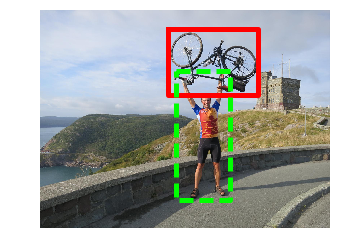

In [14]:
im = get_image(annotations[0])
plt.imshow(im)
print_bbox(b1, '-', color='#FF0000')
print_bbox(b2, '--', color='#00FF00')
plt.axis('off');

# Convert annotations to imdb_unrel

In [15]:
annotations = sio.loadmat(DIR + 'annotations.mat')
annotations = annotations['annotations']

In [16]:
MAX_ID = 2417997 # max id from visgeno
class Image():
    
    def __init__(self, annotation):
        a = annotation[0][0][0]
        rel = a[2][0][0][0][0]
        self.b1 = list(rel[2][0]) # obj_idx=0
        self.b2 = list(rel[3][0]) # obj_idx=1
        self.bboxes = [self.b1, self.b2]
        self.im_path = a[0][0]
        self.image_id = a[1][0][0]
        self.subj = rel[0][0]
        self.rel = rel[4][0][0][0]
        self.obj = rel[1][0]
        self.mapped_rels = [(0, 1, self.subj, self.rel, self.obj)]
        
    def _print(self):
        print("b1", self.b1)
        print("b2", self.b2)
        print("im_path", self.im_path)
        print("image_id", self.image_id)
        print("mapped_rels", self.mapped_rels)
        
    def to_dict(self):
        DIR_IMDB = DIR + 'images/'
        dico = {}
        dico['bboxes'] = self.bboxes
        dico['im_path'] = DIR_IMDB + self.im_path
        dico['image_id'] = int(MAX_ID + self.image_id) # to distinguish with ids from visgeno
        dico['mapped_rels'] = self.mapped_rels
        return dico
        

In [17]:
imdb = []
for a in annotations:
    I = Image(a)
    imdb.append(I.to_dict())

In [18]:
imdb = np.array(imdb)

In [19]:
type(imdb[5]['image_id'])

int

In [24]:
triplets = ['-'.join(i['mapped_rels'][0][2:]) for i in imdb]

In [28]:
doginfridge = [t for t in triplets if t=='dog-in-refrigerator']

In [30]:
len(doginfridge)

7

In [55]:
#np.save('exp-unrel/data/imdb/imdb_unrel', imdb)

# Check that annotated_triplets['triplets'] are all the uniques annotations

In [49]:
triplets = []
for triplet in annotated_triplets['triplets']:
    triplets.append(triplet[0][0])


In [50]:
rels = [im['mapped_rels'][0] for im in imdb]
rels = [rel[2:] for rel in rels]
rels = [rel[0] + '-' + rel[1] + '-' + rel[2] for rel in rels]
rels = np.unique(np.array(rels))
rels = list(rels)

In [51]:
rels == triplets

False

In [58]:
rels.sort()
rels

['bike-above-person',
 'building-has-wheel',
 'car-above-road',
 'car-in-building',
 'car-in-tree',
 'car-on the top of-bus',
 'car-on the top of-car',
 'car-on the top of-roof',
 'car-under-elephant',
 'cat-on the top of-dog',
 'cat-on the top of-person',
 'cat-ride-skateboard',
 'cat-wear-tie',
 'chair-taller than-person',
 'cone-on the top of-horse',
 'cone-on the top of-person',
 'dog-drive-car',
 'dog-in-refrigerator',
 'dog-in-tree',
 'dog-on the top of-car',
 'dog-pull-horse',
 'dog-pull-person',
 'dog-rest on-person',
 'dog-ride-bike',
 'dog-ride-dog',
 'dog-ride-horse',
 'dog-ride-motorcycle',
 'dog-ride-person',
 'dog-taller than-person',
 'dog-wear-hat',
 'dog-wear-helmet',
 'dog-wear-pants',
 'dog-wear-shirt',
 'dog-wear-shoes',
 'dog-wear-sunglasses',
 'dog-wear-tie',
 'elephant-in-tree',
 'elephant-ride-bike',
 'elephant-sleep on-person',
 'elephant-wear-glasses',
 'elephant-wear-hat',
 'elephant-wear-pants',
 'hat-on the top of-building',
 'horse-on-sofa',
 'person-above

In [59]:
for t in triplets:
    if t not in rels:
        print(t)

elephant-cover-car
person-stand on-car


In [54]:
len(triplets)

76

In [53]:
len(rels)

74

In [43]:
rels.shape

(74,)

In [41]:
triplets_unq == rels

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [25]:
rels

[(0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'bike', 'above', 'person'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'building', 'has', 'wheel'),
 (0, 1, 'bui